# Лабораторная работа №2. Дискретное преобразование Фурье 

[1. Теоретические сведения](#ch_1)  
[1.1 ДПФ и ОДПФ](#ch_1_1)  
[1.2 Шкала частот и "отрицательное время"](#ch_1_2)  
[1.3 ДПФ и ряд Фурье](#ch_1_3)  
[1.4 Амплитудный и фазовый спектры сигналов](#ch_1_4)  
[1.5 Дополнение сигнала нулями](#ch_1_5)  
[1.6 "Растекание" спектра](#ch_1_6)  
[1.7 Свойства ДПФ](#ch_1_6)  
[1.8 Быстрое преобразование Фурье](#ch_1_6)  
[1.9 Постоянная составляющая сигнала](#ch_1_6)  
[2. Основное задание](#ch_2)  
[2.1 Представить в виде ряда Фурье периодическую функцию](#ch_2_1)  
[2.2 Амплитудный и фазовый спектры действиетльного гармонического сигнала](#ch_2_2)  
[2.3 Исследование ДПФ комплексной "вырезки" гармонического сигнала](#ch_2_3)  
[3. Дополнительные задания](#ch_3)  
[4. Контрольные вопросы](#ch_4)  

## 1. Теоретические сведения <a id="ch_1"></a>  
### 1.1 ДПФ и ОДПФ <a id="ch_1_1"></a>  

***Дискретное преобразование Фурье (ДПФ,  Discrete Fourier Transform, DFT)*** испльзуется для обратотки сигналов конечной длительности, то есть состоящего из конечного числа временных отсчетов. Смысл ДПФ заключается в вычислении взаимной корреляции сигнала с комплексными экспонентами разной частоты. Это означает, что ДПФ показывает, из каких гармонических компонент состоит сигнал. Формула ДПФ: 
\begin{equation}
\tag{1}
X(n)=\sum_{k=0}^{N-1}x(k)exp(-j\frac{2\pi nk}{N}). 
\end{equation}
Здесь $x(k)$ - исходный сигнал, а $k=0,1,...,N-1$ - номера его отсчетов времени. $X(n)$ называют спектральными отсчетами.  
В общем случае, результат ДПФ может быть вычислен для любых номеров $n$, но последовательность $X(n)$ является периодической с периодом $N$. Поэтому для обработки сигнала конечной длительности достаточно иметь один период этой последовательности.  
Cуществует и ***обратное дискретное преобразование Фурье*** (ОДПФ, Inverse DFT, IDFT):  
\begin{equation}
\tag{2}
x(k) = \frac{1}{N}\sum_{n=0}^{N-1} X(n)exp(j\frac{2\pi nk}{N}). 
\end{equation}
В контексте прямого ДПФ говорят, что сигнал переводится из *временной* области в *частотную*. В контексте ОДПФ - наоборот, сигнал переводится из *частотной* области во *временную*.   

### 1.2 Шкала частот и "отрицательное время" <a id="ch_1_2"></a>  

Номера $n=0,1,...,N-1$ спектральных отсчетов $X(n)$ определяют нормированную частотную шкалу $w_{n}=2\pi\frac{n}{N}$ или $f_{n} = \frac{n}{N}$.  
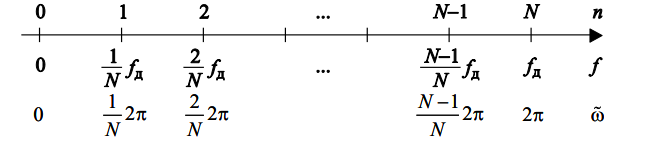  
*Рисунок 1 - Частотная шкала ДПФ*  

Вследствие периодичности всех частотных характеристик дискретных сигналов и систем вторая половина шкалы ($N/2<n<N$) соответствет ***отрицательным частотам***. А спектральный отсчет $X(N/2)$ - соответствет ***частоте Найквиста***.  
Для временной оси этот тезис также справедлив. Отсчеты $N/2<k<N$ при использовании ДПФ и ОДПФ принято считать отрицательными. Таким образом, для сигнала во времени вводится такая абстракция, как ***отрицательное время***. В задании к лабораторной работе, посвященном исследованию комплексной гармонической "вырезки", стоит на это обратить особое внимание.  

### 1.3 ДПФ и ряд Фурье <a id="ch_1_3"></a>  
Напомним, что ***рядом Фурье*** можно представить периодическую функцию $f(x)$ с периодом $\tau$ в виде:  
\begin{equation}
\tag{3}
f(x)=\frac{a_{0}}{2}+\sum_{n=1}^{+\infty} A_{n}cos\left(n\frac{2\pi}{\tau}x+\phi_{n}\right),
\end{equation}
или, если речь идет о комплексных функциях, то:  
\begin{equation}
\tag{4}
f(x)=\sum_{n=-\infty}^{+\infty} c_{n}exp\left(j\frac{2\pi}{\tau}nx\right), 
\end{equation} где 
\begin{equation}
\tag{5}
c_{n}=\frac{1}{2\pi}\int_{-\pi}^{\pi}f(x)exp\left(-j\frac{2\pi}{\tau}nx\right)\mathrm{d}x
\end{equation}  
Таким образом, любую периодическую функцию можно разложить на сумму гармонических составляющих: для действительных функций - на сумму косинусов, для комплексных функций - на сумму комплексных экспонент. Каждая гармоническая составляющая характеризуется своей амплитудой $c_{n}$, частотой $f_{n}=\frac{n}{\tau}$ и начальной фазой $\phi_{n}$. Чем больше $n$, тем лучше ряд Фурье описывает искомую периодическую функцию $f(x)$.  


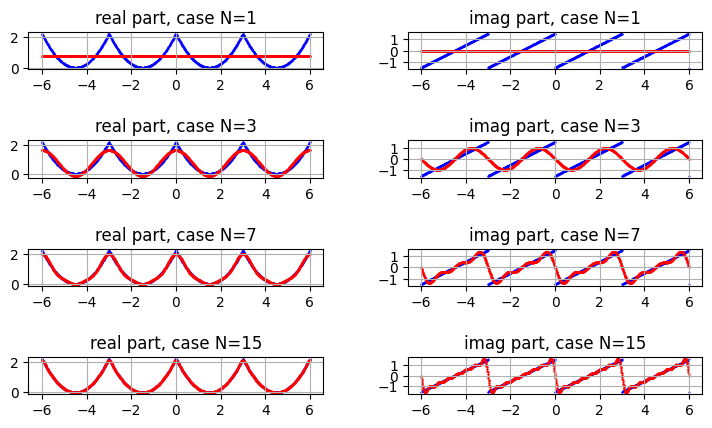

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

# Пример. Расчет коэффициентов ряда Фурье и аппроксимация исходной функции f(x) рядом Фурье
# Возьмем в качестве примера комплексную функцию, для которой:
# - действительная часть - периодическая парабола; 
# - мнимая часть - прямая с коэффициентом наклона 1. 
f = lambda x: ((x % T) - T/2.) ** 2 + ((x % T) - T/2.) * 1j

# Исходные данные
T = 3.      # Период
x1 = -6.    # Нижняя граница области определения функции
x2 = 6.     # Верхняя граница области определения функции
Nx = 1000   # Дискретизация по оси X

# Ось X
x_range = np.linspace(x1, x2, Nx)

# Эталонные кривые исходной функции f(x)
y_true = f(x_range)
y_true_real = [y.real for y in y_true]
y_true_imag = [y.imag for y in y_true]

# Расчет интеграла от комплексной функции
def integral_complex(func, a, b, **kwargs):
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    real_integral = spi.quad(real_func, a, b, **kwargs)
    imag_integral = spi.quad(imag_func, a, b, **kwargs)
    integral = (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])
    return integral

# Вычисление коэффициентов ряда Фурье c[-N/2],.., c[0], .., c[N/2-1] (всего N)
def fourier_coeffs(func, N):
    result = []
    N1 = -int(N/2)
    N2 = int((N-1)/2)
    for k in range(N1, N2+1):
        ck = (1./T) * integral_complex(lambda x: func(x) * np.exp(-1j * 2 * np.pi * k * x / T), 0, T)[0]
        result.append(ck)
    return np.array(result)

# Аппроксимация (восстановление) функции f(x) при помощи коэффициентов c[k]
def fourier_fit(x, c):
    result = 0. + 0.j
    N = len(c)
    N1 = -int(N/2)
    N2 = int((N-1)/2)
    for k in range(N1, N2+1):
        result += c[k+int(N/2)] * np.exp(1j * 2. * np.pi * k * x / T)
    return result

# Вычисление коэффициентов, аппроксимация, построение графиков при разных N
N_all = [1, 3, 7, 15]

fig, axs = plt.subplots(len(N_all), 2, figsize=(8, 5))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
row = 0
for N in N_all:
    C = fourier_coeffs(f, N)
    y_approx = fourier_fit(x_range, C)
    y_approx_real = [y.real for y in y_approx]
    y_approx_imag = [y.imag for y in y_approx]
    axs[row, 0].set_title('real part, case N=' + str(N))
    axs[row, 1].set_title('imag part, case N=' + str(N))
    axs[row, 0].grid(True)
    axs[row, 1].grid(True)
    axs[row, 0].scatter(x_range, y_true_real, color='blue', s=1, marker='.')
    axs[row, 0].scatter(x_range, y_approx_real, color='red', s=2, marker='.')
    axs[row, 1].scatter(x_range, y_true_imag, color='blue', s=1, marker='.')
    axs[row, 1].scatter(x_range, y_approx_imag, color='red', s=2, marker='.')
    row += 1
plt.show()


ДПФ можно трактовать, как разложение периодически продолженного сигнала в дискретный ряд Фурье. Если взять один период функции $f(x)$ и вычислить для него ДПФ, то в результате получится тот же набор коэффициентов $c_{n}$. Вычисление набора коэффициентов $c_{n}$ эквивалентно прямому ДПФ. Апроксимация функции $f(x)$ (вычисление суммы гармоник по формуле (4) по известным коэффициентам $c_{n}$) эквивалентно ОДПФ.  

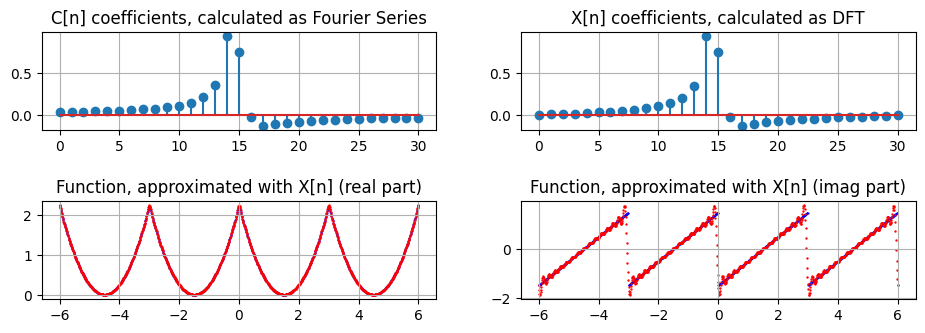

In [2]:
from scipy import fftpack

# Количество коэффициентов
N_dft = 31

# Расчет коэффициентов ряда Фурье
cn = fourier_coeffs(f, N_dft)

# Определение функции f(x) на одном периоде (от 0 до T) 
x_period = np.arange(0, T, T/N_dft)
fx = f(x_period)

# Расчет коэффициентов методом ДПФ
X = fftpack.fft(fx) / N_dft
X = np.roll(X, int(N_dft/2))

# Аппроксимация функции f(x) новым набором коэффициентов
y_approx = fourier_fit(x_range, X)
y_approx_real = [y.real for y in y_approx]
y_approx_imag = [y.imag for y in y_approx]

# Отображение результатов
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
axes[0,0].stem(np.real(cn))
axes[0,0].grid(True)
axes[0,0].set_title('C[n] coefficients, calculated as Fourier Series')
axes[0,1].stem(np.real(X))
axes[0,1].grid(True)
axes[0,1].set_title('X[n] coefficients, calculated as DFT')
axes[1,0].scatter(x_range, y_true_real, color='blue', s=1, marker='.')
axes[1,0].scatter(x_range, y_approx_real, color='red', s=2, marker='.')
axes[1,0].set_title('Function, approximated with X[n] (real part)')
axes[1,1].scatter(x_range, y_true_imag, color='blue', s=1, marker='.')
axes[1,1].scatter(x_range, y_approx_imag, color='red', s=2, marker='.')
axes[1,1].set_title('Function, approximated with X[n] (imag part)')
axes[1,0].grid(True)
axes[1,1].grid(True)
plt.show()

### 1.4 Амплитудный и фазовый спектры сигналов <a id="ch_1_4"></a>  
Вернемся к формуле (1) ДПФ. Сковокупность коэффициентов $A_{n} = |X_{n}|$ называют ***амплитудным частотным спектром*** дискретного сигнала $x_{k}$. Амплитудный частотный спектр показывает уровни (амплитуды) гармоник, составляющих исходный сигнал.  
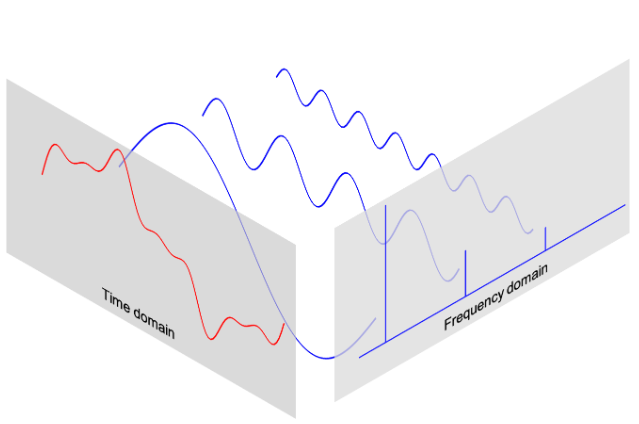  
*Рисунок 2 - Интерпретация амплитудного частотного спектра сигнала*  

На рисунке 2 приведен пример сигнала (Time domain), состоящего из 3 гармонических составляющих. Амплитудный спектр этого сигнала (Frequency domain) отражает уровни гармоник, на которые можно разложить исходный сигнал. Такое представление имеет большое значение в цифровой обработке сигналов и встречается повсеместно при *спектральном анализе*. 

***Фазовым частотным спектром*** называют совокупность начальных фаз всех гармонических составляющих сигнала. Фазовый спектр вычисляется по формуле: 
\begin{equation}
\tag{6}
\Phi_{n} = arctg{\frac{imag(X_{n})}{real(X_{n})}}
\end{equation}

Амплитудный спектр действительного сигнала симметричен относительно частоты найквиста: отрицательная область частот симметрична положиельной области частот. Фазовый частотный спектр действительного сигнала - антисимметричен относительно частоты найквиста. Поэтому для действительных сигналов на практике рассматривается область значений спектров от 0 до $f_{н} = f_{s} / 2$ (область положительных частот). Для комплексных сигналов в спектральном анализе вся область значений амплитудного спектра от 0 до $f_{s}$ (как область положительных частот, так и область отрицательных частот).  

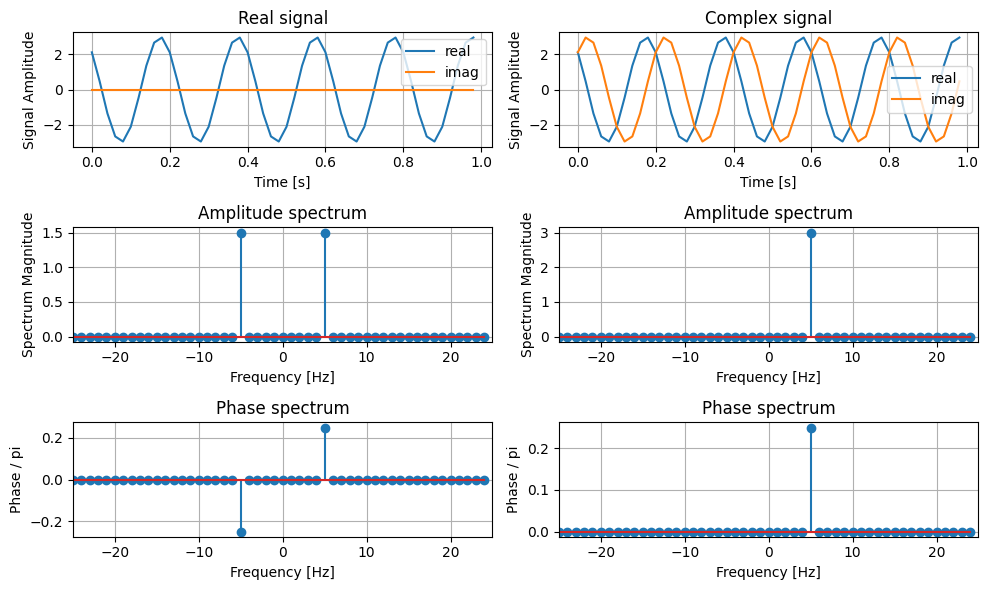

In [3]:
from matplotlib import pyplot as plt
from scipy import fftpack
import numpy as np 

f0  = 5          # Частота гармонического сигнала в Гц
phi0 = np.pi/4   # Начальная фаза гармонического сигнала
fs = 50          # Частота дискретизации в Гц
T = 1/fs         # Период дискретизации в секундах
N = 50           # Размер ДПФ (количество гармоник)
Amp = 3          # Амплитуда сигнала

# Оси времени и частоты
t = np.linspace(0, N*T, N, endpoint = False)
f = fftpack.fftfreq(N) * fs

# Генерация действительного и комплексного гармонического сигнала
x1 = Amp * np.cos(2 * np.pi * f0 * t + phi0)
x2 = Amp * np.exp(1j * (2 * np.pi * f0 * t + phi0))

# Дискретное преобразование Фурье
X1 = fftpack.fft(x1) / N
X2 = fftpack.fft(x2) / N

# Амплитудный и фазовый частотный спектры 
A1 = np.abs(X1);
A2 = np.abs(X2);
P1 = np.arctan(np.imag(X1) / (np.real(X1)+1e-6)); 
P2 = np.arctan(np.imag(X2) / (np.real(X2)+1e-6));
# ПРИМЕЧАНИЕ. Для того, чтобы избавиться от неопределенности типа 0/0 при вычислении фазового спектра, 
# прибавим к знаменателю достаточно малое число, чтобы частное было близко к нулю, и корректно отображалось на графике. 
# В противном случае, в точках с нулевыми гармониками мы будем видеть случайные значения, полученные в результате 
# деления малых чисел, близких к 0, с ограниченной точностью, что не очень адекватно отразит изучаемые свойства спектров. 

# Отображение группами (subplot)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 6))
for i in range(0,2):
    if i == 0:
        x = x1
        A = A1
        P = P1
        Title = 'Real signal'
    else:
        x = x2
        A = A2
        P = P2
        Title = 'Complex signal'
    axes[0,i].plot(t, np.real(x), label='real')
    axes[0,i].plot(t, np.imag(x), label='imag')
    axes[0,i].grid(True)
    axes[0,i].set_xlabel('Time [s]')
    axes[0,i].set_ylabel('Signal Amplitude')
    axes[0,i].legend()
    axes[0,i].title.set_text(Title)
    axes[1,i].stem(f, A)
    axes[1,i].grid(True)
    axes[1,i].set_xlabel('Frequency [Hz]')
    axes[1,i].set_ylabel('Spectrum Magnitude')
    axes[1,i].set_xlim(-fs/2, fs/2)
    axes[1,i].title.set_text('Amplitude spectrum')
    axes[2,i].stem(f, P / np.pi)
    axes[2,i].grid(True)
    axes[2,i].set_xlabel('Frequency [Hz]')
    axes[2,i].set_ylabel('Phase / pi')
    axes[2,i].set_xlim(-fs/2, fs/2)
    axes[2,i].title.set_text('Phase spectrum')
fig.tight_layout()
plt.show()


### 1.5 Дополнение сигнала нулями <a id="ch_1_5"></a>  

Стоит обратить внимание на одну важную особенность обработки сигналов методом ДПФ. Если к конечному набору отсчетов сигнала добавить некоторое количество нулей, то ДПФ этого сигнала не изменится (область значений по оси частот не увеличится), но увеличится дискретизация по оси частот. Спектральные характеристики сигнала можно рассмотреть более наглядно. Таким образом, дополнение сигнала нулями - это способ приблизить конечный (с ограниченным периодом) сигнал к бесконечному, увеличив его период. Спектр этим способом приближается к непрерывному.  

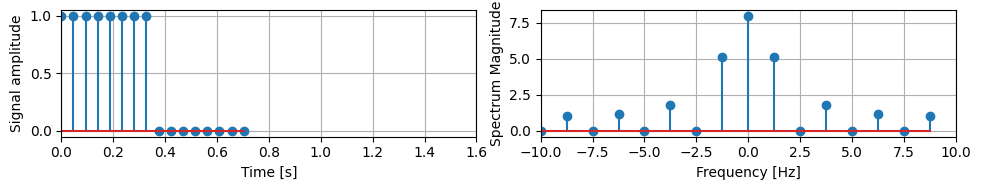

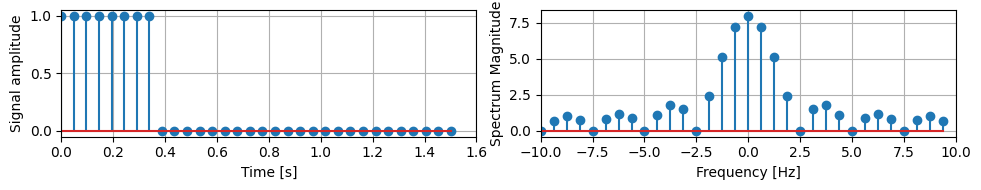

In [4]:
from matplotlib import pyplot as plt
from scipy import fftpack
import numpy as np 

Ns = [16,32]

for N in Ns:  
    Ni = 8
    fs = 20
    T = 1/fs
    t = np.linspace(0, (N-1)*T, N, endpoint = False )
    x = np.concatenate((np.ones(Ni), np.zeros(N-Ni)))
    f = fftpack.fftfreq(len(x)) * fs
    X = fftpack.fft(x)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 2))
    axes[0].stem(t, x)
    axes[0].grid(True)
    axes[0].set_xlabel('Time [s]')
    axes[0].set_ylabel('Signal amplitude')
    axes[0].set_xlim(0, np.max(Ns)*T)
    axes[1].grid(True)
    axes[1].stem(f, np.abs(X))
    axes[1].set_xlabel('Frequency [Hz]')
    axes[1].set_ylabel('Spectrum Magnitude')
    axes[1].set_xlim(-fs / 2, fs/ 2)
    fig.tight_layout()
    plt.show()
    

### 1.6 "Растекание" спектра <a id="ch_1_6"></a>  

Как уже было показано выше, результат ДПФ можно трактовато как разложение периодически продолженного сигнала в дискретный ряд Фурье. Если представить, что сигнал за пределами своего периода продолжается, и за $N-1$-м отсчетом идет 0й, 1й и т.д., то на стыке периодов могут возникать скачки. Из-за этих скачков спектр расширяется - все или почти все гармоники преобразования Фурье имеют ненулевые амплитуды.  
Если гармонические составляющие исходного сигнала $s(n) = Acos(2\pi f_{0}nT + \phi_{0})$ имеют целое число периодов (то есть, $f_{0}N$ - целое число), то периодически продолженный сигнал представляет собой дискретное гармоническое колебание (без скачков). Из формулы (1) ДПФ в данном случае сделует, что вычисленное ДПФ будет содержать лишь два спектральных отсчета, отличных от 0. Если соотношение $f_{0}N$ не является целым числом, то периодически продолженная последовательность не будет являться набором отсчетом дискретного гармонического сигнала - в точках стыков возникают скачки фазы. Поэтому, в полном соответствии со своствами ряда Фурье, для представления такого сигнала нужны дополнительные гармоники.  
Появление множества боковых отсчетов большого уровня вокруг спектральных пиков в случае, если на длине анализируемого фрагмента укладывается нецелое число периодов колебания, называется ***растеканием спектра*** при ДПФ (*spectrum leakage*).  


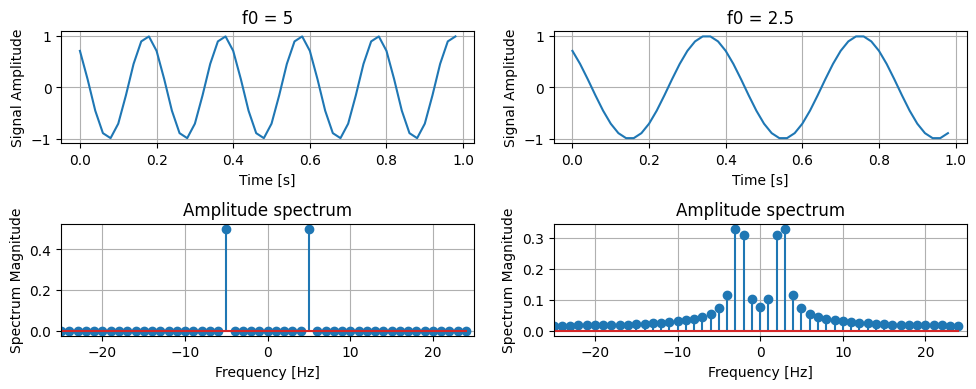

In [5]:
from matplotlib import pyplot as plt
from scipy import fftpack
import numpy as np 

f01  = 5         # Частота гармонического сигнала в Гц
phi01 = np.pi/4  # Начальная фаза гармонического сигнала
f02  = 2.5       # Частота гармонического сигнала в Гц
phi02 = np.pi/4  # Начальная фаза гармонического сигнала
fs = 50          # Частота дискретизации в Гц
T = 1/fs         # Период дискретизации в секундах
N = 50           # Размер ДПФ (количество гармоник)
Amp = 1          # Амплитуда сигнала

# Оси времени и частоты
t = np.linspace(0, N*T, N, endpoint = False)
f = fftpack.fftfreq(N) * fs

# Генерация действительного и комплексного гармонического сигнала
x1 = Amp * np.cos(2 * np.pi * f01 * t + phi01)
x2 = Amp * np.cos(2 * np.pi * f02 * t + phi02)

# Дискретное преобразование Фурье
X1 = fftpack.fft(x1) / N
X2 = fftpack.fft(x2) / N

# Амплитудный и фазовый частотный спектры 
A1 = np.abs(X1);
A2 = np.abs(X2);

# Отображение группами (subplot)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))
for i in range(0,2):
    if i == 0:
        x = x1
        A = A1
        f0 = f01
    else:
        x = x2
        A = A2
        f0 = f02
    axes[0,i].plot(t, np.real(x))
    axes[0,i].grid(True)
    axes[0,i].set_xlabel('Time [s]')
    axes[0,i].set_ylabel('Signal Amplitude')
    axes[0,i].set_title('f0 = ' + str(f0))
    axes[1,i].stem(f, A)
    axes[1,i].grid(True)
    axes[1,i].set_xlabel('Frequency [Hz]')
    axes[1,i].set_ylabel('Spectrum Magnitude')
    axes[1,i].set_xlim(-fs/2, fs/2)
    axes[1,i].title.set_text('Amplitude spectrum')
fig.tight_layout()
plt.show()

### 1.7 Свойства ДПФ <a id="ch_1_7"></a>
1. ***Линейность***. ДПФ является линейным преобразованием. Это следует из формулы ДПФ. Пусть временная последовательность (сигнал) представлен в виде линейной комбинацией сигналов в рамках единого периода $N$: $ax(k)+by(k)$. Тогда ДПФ такой последовательности также является линейной комбинацией ДПФ составляющих сигнала: $aX(n)+bY(n)$.  
2. ***Задержка***. Спектр задержанного сигнала на $\delta_k$ отсчетов равен спектру исходного сигнала, домноженному на комплексный коэффициент $exp(-j\frac{2\pi n\Delta k}{N})$: 
\begin{equation}
\tag{7}
Y(n) = X(n)exp(-j\frac{2\pi n\Delta k}{N}). 
\end{equation}

3. ДПФ ***круговой (циклической) свертки*** двух периодических временных последовательностей равен произведению ДПФ этих сигналов:
\begin{equation}
\tag{8}
Y(n) = X_{1}(n)X_{2}(n),
\end{equation}
где $X_{1}(n)$ - ДПФ последовательности $x_{1}(k)$, $X_{2}(n)$ - ДПФ последовательности $x_{2}(k)$, а $Y(n)$ - ДПФ последовательности $y(k)$, которая является круговой сверткой двух последовательностей и описывается формулой   
\begin{equation}
\tag{9}
y(k)=\sum_{m=0}^{N-1} x_{1}(m)x_{2}\left((k-m)modN\right). 
\end{equation}  

4. ДПФ ***произведения сигналов*** представляет собой циклическую свертку ДПФ этих сигналов:  
\begin{equation}
\tag{10}
Y(n) = \frac{1}{N}\sum_{m=0}^{N-1} X_{1}(m)X_{2}\left((n-m)modN\right), 
\end{equation}
где $Y(n)$ - ДПФ произведения сигналов $y(k) = x_{1}(k)x_{2}(k)$.  

### 1.8 Быстрое преобразование Фурье <a id="ch_1_8"></a>  
Для вычисления одного коэффициента ДПФ по формуле (1) необходимо выполнить $N$ комплексных умножений и сложений. Таким образом, расчет всего ДПФ, содержащего N коэффициентов, потребуде $N^{2}$ пар операций "умножение-сложение". Число операций возрастает пропорционально квадрату размерности ДПФ. Если оптимально организовать вычисления, можно сократить число операций и замедлить их скорость роста при увеличении $N$. Такие способы вычисления ДПФ называются ***Быстрым преобразованием Фурье*** (БПФ, FFT - Fast Fourier Transform). Вышесказанное справедливо и для обрабного БПФ (ОБПФ, IFFT).  
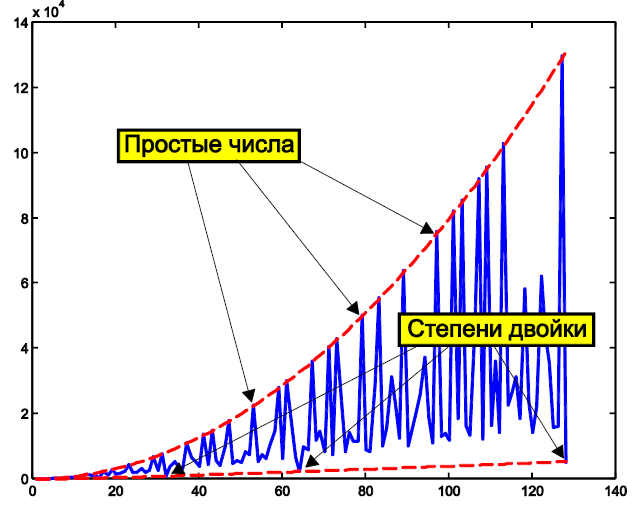  
*Рисунок 3 - Зависимость числа арифметических операций от размерности БПФ*  

Некоторые важные моменты, которые следует знать о БПФ:  
- БПФ не является приближенным алгоритмом; при отсутствии вычислительных погрешностей он даст в точности тот же результат, что и исходная формула ДПФ (1). Ускорение достигается исключительно за счет оптимальной организации вычислений;
- существуют разные алгоритмы БПФ, предназначенные для работы с сигналами, длина которых обладает различными математическими свойствами. Наибольшее ускорение вычислений достигается при использовании алгоритма *Кули-Тьюки* в случае, когда длина анализируемого сигнала равна степени двойки (нижняя граница на рисунке 3);
- алгоритм БПФ предназначен для одновременного расчета всех спектральных отсчетов $X(n)$. Если необходимо получить эти отсчеты лишь для некоторых n, может оказаться предпочтительнее основная формула ДПФ (1).

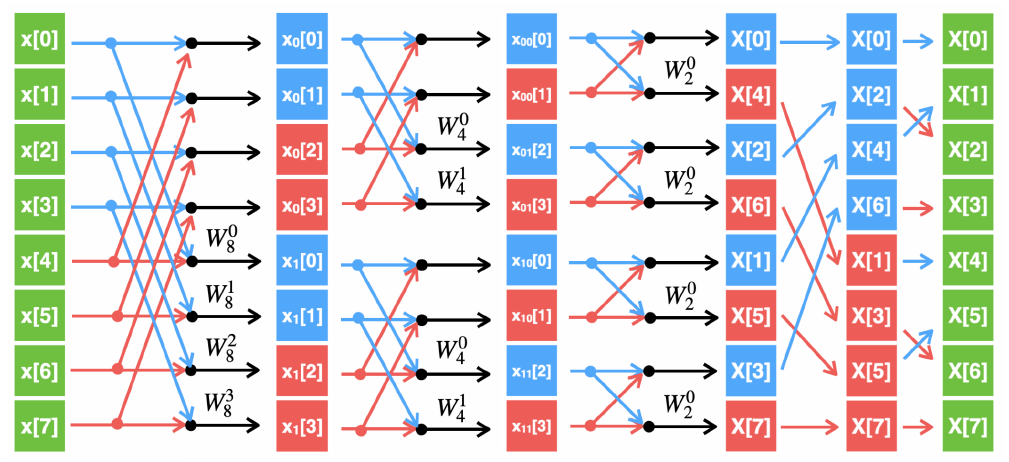  
*Рисунок 4 - Пример вычислительного графа БПФ для сигнала из 8 отсчетов*  

### 1.9 Постоянная составляюзая сигнала <a id="ch_1_9"></a> 
***Постоянная составляющая сигнала*** - это среднее арифметическое выборки сигнала из N отсчетов. В спектральном представлении сигнала информацию о постоянной составляющей сигнала несет нулевая гармоника (значение спектра, соответствующее точке 0 на частотной оси). Обратите внимание на пример спектра из п.1.5. В обоих случаях, если рассчитать среднее значение сигнала во временной области, оно будет ненулевым. В спектре мы видим, что центральная (нулевая) гармоника имеет отличное от нуля значение. С другой стороны, в первом примере из п.1.6 мы видим, что среднее значение сигнала равно 0, а центральная гармоника в спектре равна 0. Постоянную составляющую можно интерпретировать так: это гармоника с бесконечно малой частотой, значение которой в течение периода сигнала не меняется, то есть является константой. Для ряда Фурье постоянной составляющей является гармоника с коэффициентом под номером 0 ($C_{0}$, см. пример из п.1.3, случай N=1).  

## 2. Основное задание <a id="ch_2"></a>  

### 2.1 Представить в виде ряда Фурье периодическую функцию <a id="ch_2_1"></a>  
1. Вычислить коэффициенты ряда Фурье для периодической функции f(x).
2. Аппроксимировать функцию, представленную в виде ряда Фурье.
3. Изобразить на графике исходную и аппроксимированную функции. Для наглядности изобразить несколько периодов. 
4. Изобразить несколько вариантов аппроксимации при различных N (количество гармоник).
5. Найти коэффициенты ряда Фурье методом ДПФ. Изобразить на графике исходную и аппроксимированную функции.

*Таблица 1 - Варианты функций для представления в виде ряда Фурье*  
|Номер по списку|Функция|
|---|---|
|1,8,15,22,29|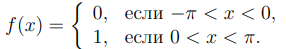|
|2,9,16,23,30|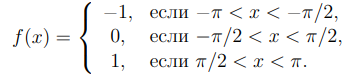|
|3,10,17,24||
|4,11,18,25||
|5,12,19,26|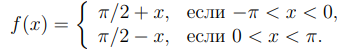|
|6,13,20,27|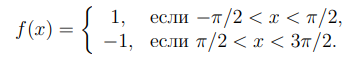|
|7,14,21,28|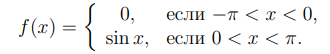|  

### 2.2 Амплитудный и фазовый спектры действиетльного гармонического сигнала <a id="ch_2_2"></a>  
1. Сформировать два синусоидальных (гармонических) сигнала с амплитудами $A_{1}$ и $A_{2}$, частотами $f_{01}$ и $f_{02}$, начальными фазами $\phi_{01}$ и $\phi_{02}$. Сформировать сумму этих сигналов.
2. Для суммы этих сигналов требуется вычислить ДПФ. Количество точек ДПФ взять равным количеству точек во входном сигнале. Рассчитать амплитудный и фазовый спектры сигнала, изобразить их на графиках, проанализировать полученные результаты.
3. Добавить к сумме сигналов шум амплитудой $A_{noise}$ (аналогично тому, как это делалось в лабораторной работе №1). Рассчитать спектры сигнала, изобразить их на графиках, проанализировать полученные результаты.
4. Добавить к полученному на этапе 3 сигналу константу, равную $KA_{1}$. Рассчитать спектры сигнала, изобразить их на графиках, проанализировать полученные результаты.
5. Для сигнала, полученного на этапе 1, вычислить ДПФ с количеством точек, равным 512. Рассчитать спектры сигнала, изобразить их на графиках, проанализировать полученные результаты.

#### Исходные данные для выполнения задания:  
 - $A_{1} = (\text{номер по списку}) mod (4)$;
 - $A_{2} = (1 + \text{номер по списку}) mod (4)$;
 - $f_{01}$ - номер по списку;
 - $f_{02}$ - номер компьютера;
 - $\phi_{01} = \frac{3\pi}{4}$;
 - $\phi_{01} = \frac{2\pi}{\text{номер по списку}}$;
 - $f_{s} = 64$ (частота дискретизации);
 - $\tau = 1$ (сек, длительность сигнала);
 - $A_{noise} = 2 + (\text{номер по списку}) mod (4)$;
 - $K = 0.25*(1 + (\text{номер по списку}) mod (8))$.

### 2.3 Исследование ДПФ комплексной "вырезки" гармонического сигнала <a id="ch_2_3"></a>  

Требуется произвести расчет спектров комплексного сигнала. Для получения более качественных спектральных характеристик вычисление ДПФ производится с бОльшим периодом, чем длина исходного сигнала (см. раздел 1.5). В данном задании необходимо аналитически (на основании материала лекций по ЦОС) предсказать характеристики спектров для вашего варианта задания, а затем сравнить полученные результаты с результатами моделирования при помощи python.  
1. На основании исходных данных $N_{i}$ (длина исходного сигнала в отсчетах, нечетное число) и $N$ (общее количество отсчетов сигнала) сформировать комплексную гармоническую "вырезку" таким образом, чтобы в положительной и отрицательной области было равное количество отсчетов сигнала. Не случайно $N_{i}$ предлагается взять нечетным числом:
 - 1 отсчет приходится на 0-ю позицию;
 - $\frac{N_{i}-1}{2}$ отсчетов приходится на положительную область (от 1-го до $\frac{N_{i}-1}{2}$-го отсчетов);
 - $\frac{N_{i}-1}{2}$ отсчетов приходится на положительную область (от $(N-1-\frac{N_{i}-1}{2})$-го до $(N-1)$-го отсчетов). 

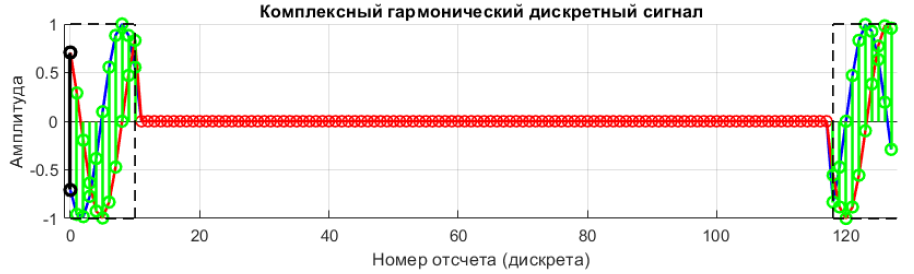  
*Рисунок 5 - Пример построения комплексной гармонической "вырезки". Здесь $N=128, N_{i}=21, \phi_{0}=3\pi/4$. Синяя кривая - действительная часть, красная - мнимая, черным выделен нулевой отсчет.*  

Обратите внимание, что сигнал "перетекает" из положительной области в отрицательную непрерывно (в точне n=0 нет разрыва).  
Изобразить полученный сигнал на графике.  

2. Рассчитать спектры сигнала, изобразить их на графиках, проанализировать полученные результаты. Убедиться в линейности фазового спектра и отсутствии его наклона.  
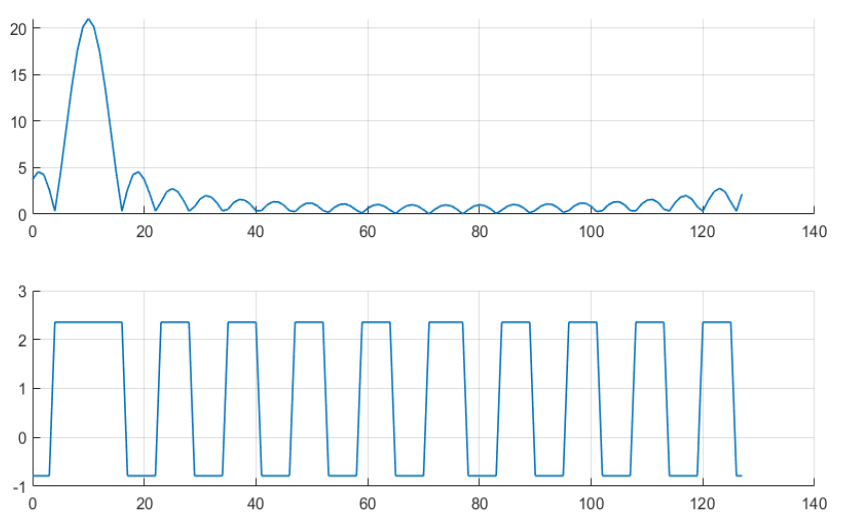
*Рисунок 6 - Амплитудный и фазовый спектры комплексной гармонической "вырезки" без смещения ($s=0$)*  

3. Для полученной комплексной гармонической вырезки выполнить циклическое смещение по отсчетам.

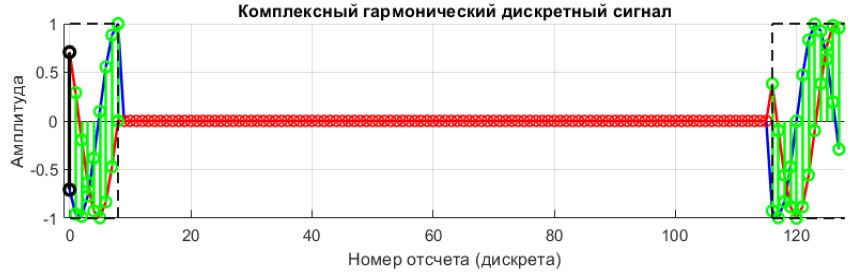  
*Рисунок 7 - Комлексная гармоническая "вырезка" со смещением на 2 отсчета влево ($s=-2$)*  

Обратите внимание, что смещение не меняет фазу сигнала относительно нулевого отсчета. То есть для любого смещения (см пример из рисунков 5 и 7) значение косинуса и синуса в точке n=0 поменяться не должно. При этом непрерывность в точке 0 сохраняется. Иначе говоря, смещение на на значение $s$ подразумевает взятие других $N_{i}$ отсчетов того же исходного сигнала, но с нарушением баланса: в положительной области берется на $s$ отсчетов больше, в отрцательной - $s$ отсчетов меньше (если $s$ - отрицательное, то наоборт). Если $s=0$, то смещения не наблюдается, что эквивалентно примеру на рисунках 5 и 6.   

4. Рассчитать спектры сигнала, изобразить их на графиках, проанализировать полученные результаты. Убедиться в линейности фазового спектра и в возникновении наклона.  
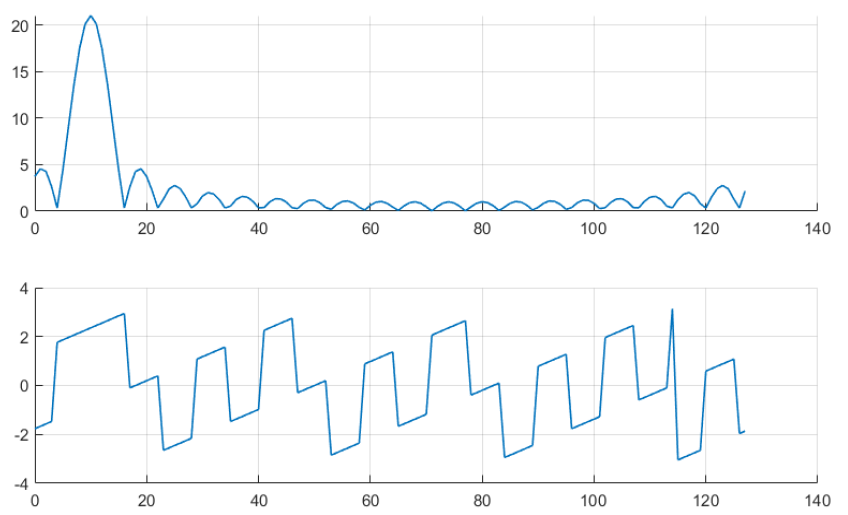  
*Рисунок 8 - Амплитудный и фазовый спектры комплексной гармонической "вырезки" со смещением $s=-2$*

5. Рассчитать теоретические параметры спектров и сравить их с результатами, полученными при моделировании (на этапах 1-4):
- величину главного максимума амплитудного спектра: $A = N_{i}$;
- положение гравного максимума амплитудного спектра $f_{0}^{`}$ (в номерах отсчета спектра): $f_{0}^{`}=f_{0}TF_{s}$, $F_{s}$ - дискрет частоты спектров (то есть шаг по оси OX), $T$ - период дискретизации;
- нули амплитудного спектра: $f_{1}^{`}=\frac{1}{t_{i}}=\frac{1}{TN_{i}}=\frac{N}{N_{i}}F_{s}$, $N$ - длина периода ДПФ (длина сигнала) в отсчетах;  
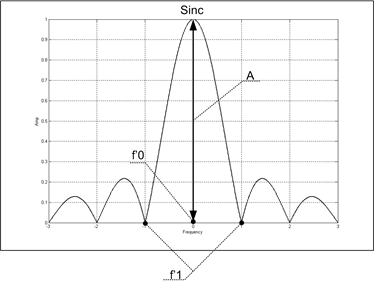  
*Рисунок 9 - Форма амплитудного спектра вида sinc*

- характер наклона фазового спектра: $\phi(\mu)=\Delta\phi(\mu)+\phi_{0} = -s\mu\frac{2\pi}{N}+\phi_{0}$, где $\mu$ - отклонение в отсчетах оси OX относительно точки, соответствующе максимуму амплитудного спектра, $\phi_{0}$ - начальная фаза сигнала, $s$ - смещение сигнала по отсчетам во временной области (операция на этапе 3).
Необходимо выбрать контрольную точку на оси OX, отстоящую на $\mu$ отсчетов от точки {$f_{0}^{`}, \phi_{0}$}, рассчитать по приведенной формуле значение фазового спектра в данной точке и сравнить с тем, что получилос на графиках по результатам этапа 4.  
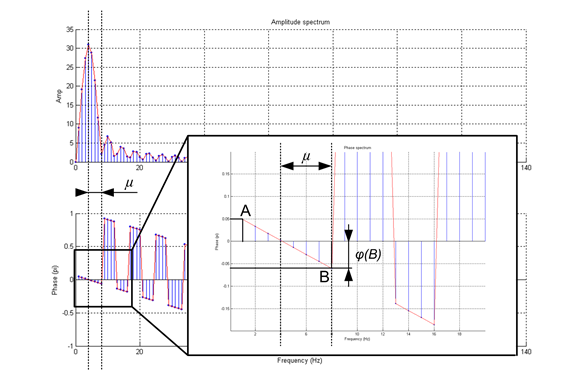  
*Рисунок 10 - Проверка характера наклона фазового спектра*  

#### Исходные данные для выполнения задания:  
- $f_{0} = 1 + (\text{номер по списку}) mod (4)$ - частота исходного сигнала;
- $\phi_{0} = 2\pi/(3 + (\text{номер по списку}) mod (4))$ - начальная фаза исходного сигнала;
- $N=128$ - длина периода вычисления ДПФ (в отсчетах);
- $T = 1/(3f_{0}*((\text{номер по списку}) mod (8)))$ - период дискретизации;
- $s = sign*((\text{номер по списку}) mod (8))$, где $sign=(-1)*(\text{номер по списку}) mod (2)$

## 3. Дополниетльные задания <a id="ch_3"></a>  
1. Написать функцию, реализующую вычислительный граф БПФ. Выполнить пункты 1 и 2 из задания 2.2, используя собственную функцию БПФ. Убедиться в идентичности результатов.
2. Проверить свойство 2 ДПФ из п. 1.7.
3. Проверить свойство 3 ДПФ из п. 1.7.
4. Проверить свойство 4 ДПФ из п. 1.7.

Вариант дополнительного задания выбирается из расчета $(\text{номер по списку}) mod (4) + 1$.  

## 4. Контрольные вопросы <a id="ch_4"></a>  

1. Что такое частота дискретизации?
2. Что такое ДПФ, ОДПФ?
3. Что такое БПФ, ОБПФ?
4. В чем отличие БПФ от ДПФ? Есть ли разница в результатах работы БПФ и ДПФ для периода исходного сигнала в 1024 отсчета?
5. Что такое амплитудный частотный спектр?
6. Что такое Фазовый частотный спектр?
7. Что такое ряд Фурье? Для каких функций он применим?
8. Какие вы знаете свойства ДПФ?
9. Какие есть способы увеличить качество спектральных характеристик сигнала?
10. Чем можно объяснить эффект "растекания" спектра?
11. Как получить коэффициенты $C_{n}$ ряда Фурье, используя ДПФ?122. Изобразите эскизы амплитудого -частотного и фазвого очастотного спектова для суммы трех действительных синусоидальных сигналов длительностью 1 сек. единичной амплитуды с нулевыми начальными фазами и частотами 1 Гц, 5 Гц, 10 Гц соответственно. Частота дискретизации 32 Гц.13
3. Как определить амплитуду сигнала по амплитудму о-частотному спектру14
4. Что такое начальная фаза сигнала15 
5. Как определить начальную фазу сигнала по вому фазочастотному спект16у?
6. Что такое постоянная составляющая сигна17а? 
7. При каких условиях постоянная составляющая суммы синусоидального сигнала с шумом равна 18улю?
8. Изобразите эскизы амплитудно-частотного и фазочастотного спектра для суммы трех комплексных синусоидальных сигналов длительностью 1 сек. единичной амплитуды с нулевыми начальными фазами и частотами 1 Гц, 5 Гц, 10 Гц соответственно. Частота дискретизации 192 Гц.
9. Изобразите эскизы амплитудно-частотного и фазочастотного спектра для комплексного синусоидального сигнала длительностью 7 отсчетов единичной амплитуды с нулевой начальной фазой и частотой 5 Гц. Частота дискретизации 32 Гц. Расположение сигнала по отсчетам: 125, 126, 127, 0, 1,20, 3. 
10. Изобразите эскизы амплитудно-частотного и фазочастотного спектра для этого же сигнала с расположением по отсчетам: 123, 124, 125, 126, 1221 0, 1.
11. Как рассчитать наклон фазового спектра для сдвинутого по отсчетам комплексного ситусоидального сигнала? 
